In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import MDAnalysis as mda
from MDAnalysis.analysis import rdf

In [2]:
mda_traj = mda.Universe("../1-SPCE_343-H2O/topology.pdb", "../1-SPCE_343-H2O/traj.xyz", dt=0.01) # dt=0.01 ps

In [3]:
mda_traj.dimensions = [21.725, 21.725, 21.725, 90, 90, 90] # PBC box : lx ly lz alpha beta gamma

In [4]:
s1 = mda_traj.select_atoms('name O')
s2 = mda_traj.select_atoms('name H')

In [5]:
def plot_rdf(selection1, selection2, graph_title):
    rdf_object = rdf.InterRDF(selection1, selection2, nbins=150, range=(0.1,10),verbose=True)
    rdf_object.run()
    
    plt.plot(rdf_object.results.bins, rdf_object.results.rdf)
    plt.xlabel("r "+r'[$\AA{}$]')
    plt.ylabel("g(r)")
    plt.title(graph_title)
    plt.show()

  0%|          | 0/1001 [00:00<?, ?it/s]

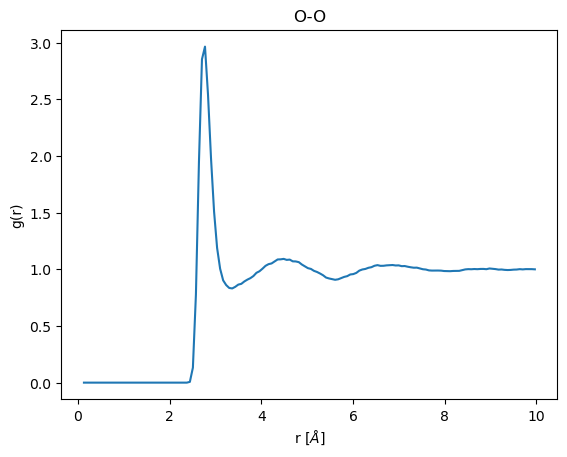

In [6]:
plot_rdf(s1,s1,"O-O")

  0%|          | 0/1001 [00:00<?, ?it/s]

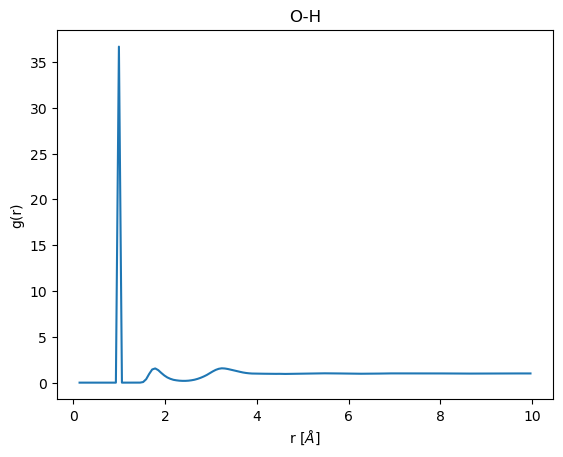

In [7]:
plot_rdf(s1,s2,"O-H")

  0%|          | 0/1001 [00:00<?, ?it/s]

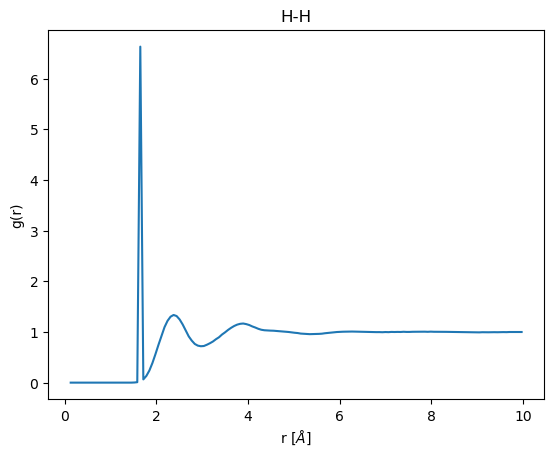

In [8]:
plot_rdf(s2,s2,"H-H")